In [1]:
import pandas as pd

In [2]:
BID = pd.read_csv('./dataset/BID1.csv')
BID.head(5)

,Symbol,Value,TradingDate,Time,Open,High,Low,Close,Volume
0,BID,1.590710e+11,24/1/2014,NaN,19000,19500,18500,18800,8417060
1,BID,5.950934e+10,27/1/2014,NaN,18700,18800,18100,18400,3240910
2,BID,1.713530e+10,6/2/2014,NaN,18200,18300,17600,17600,959590
3,BID,5.025221e+10,7/2/2014,NaN,17400,17500,16500,16600,2987600
4,BID,6.791783e+10,10/2/2014,NaN,16500,17200,16200,17000,4052090


In [3]:
inputCols = ["Open", "High", "Low", "Volume"]
X = BID[inputCols]
X.head()

,Open,High,Low,Volume
0,19000,19500,18500,8417060
1,18700,18800,18100,3240910
2,18200,18300,17600,959590
3,17400,17500,16500,2987600
4,16500,17200,16200,4052090


In [4]:
y = BID["Close"]
y.head()

0    18800
1    18400
2    17600
3    16600
4    17000
Name: Close, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 2432
Labels counts in y_train: 1702
Labels counts in y_test: 730


In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:

dtree = DecisionTreeRegressor(max_depth = 3, criterion = 'squared_error')

# Fit mô hình với train data
dtree.fit(X_train, y_train)

# Predict trên train/test data dùng mô hình đã train
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

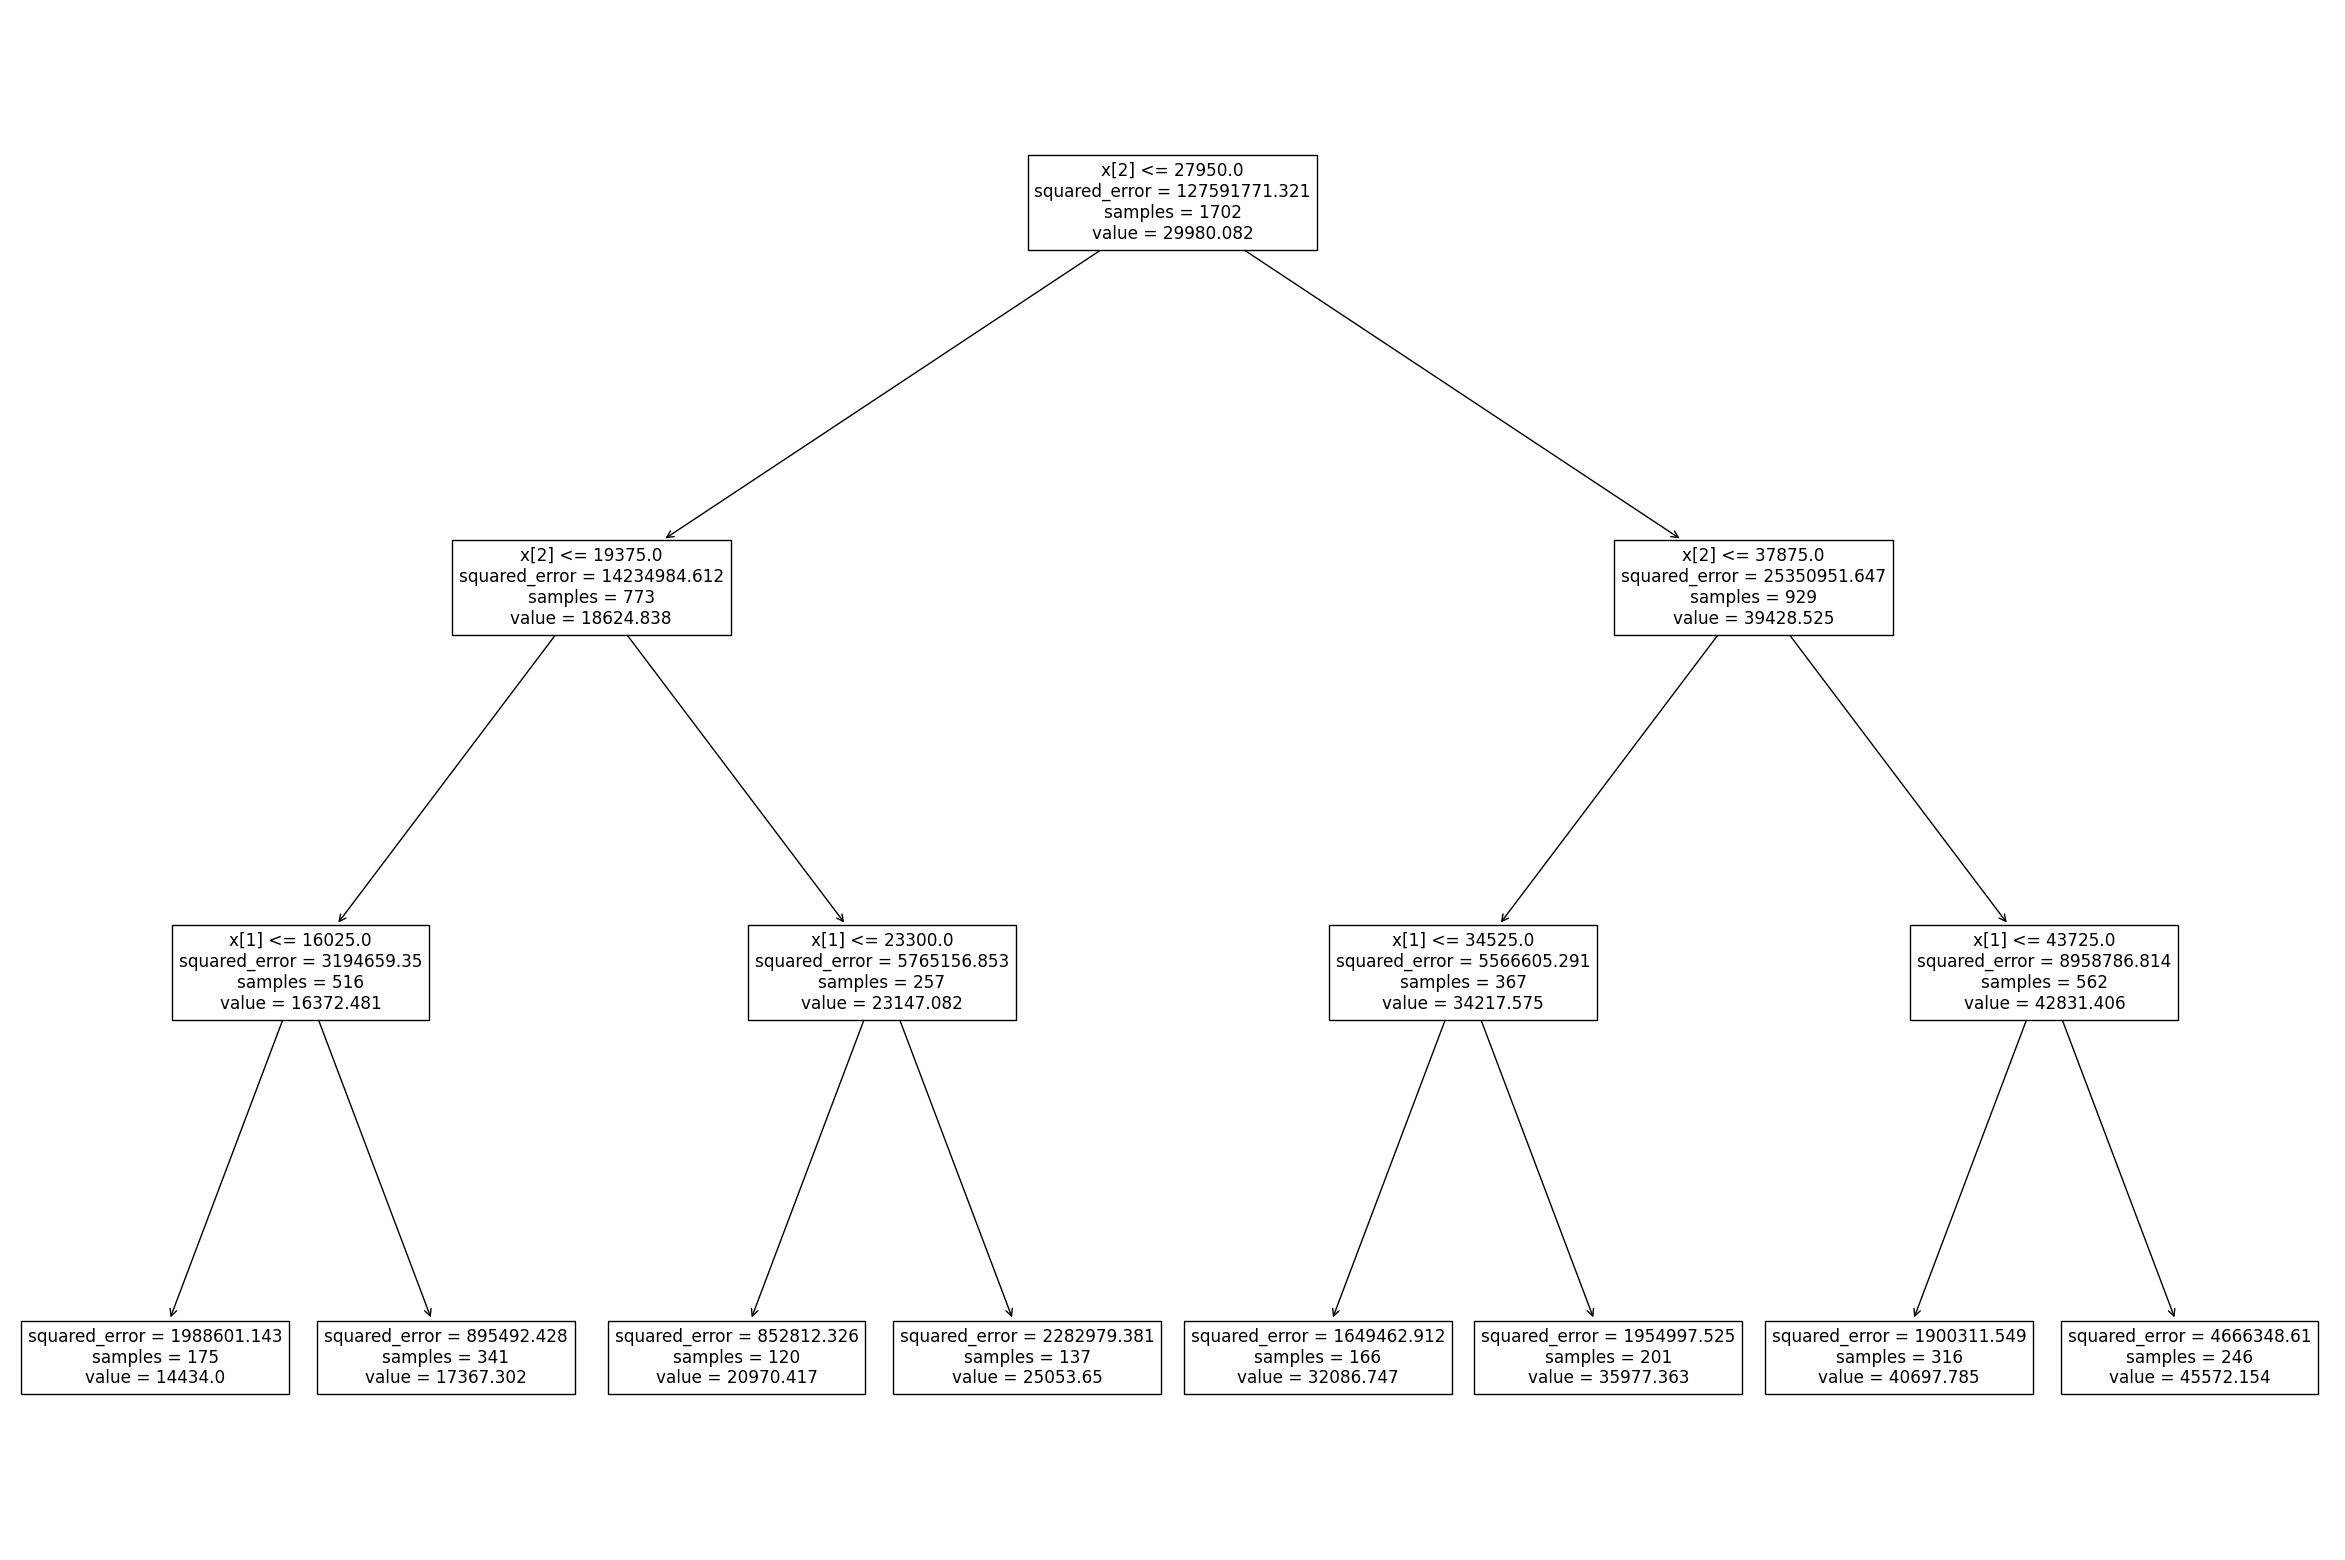

In [10]:
plt.figure(figsize = (30, 20))

# Plot the Decision Tree
plot_tree(dtree)

plt.show();

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
MSE_train = mean_squared_error(y_train, y_pred_train)
r_score_train = r2_score(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
r_score_test = r2_score(y_test, y_pred_test)
print("MSE train = ", MSE_train)
print("r2 score train = ", r_score_train)
print("MSE test = ", MSE_test)
print("r2 score test = ", r_score_test)

MSE train =  2046803.3640399163
r2 score train =  0.9839581867792309
MSE test =  2282452.298755411
r2 score test =  0.9819162015685866


## Model selection cho Decision Tree dùng phương pháp holdout

In [13]:

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 1)

In [14]:
import numpy as np

In [15]:
train_MSE = []
val_MSE = []
test_MSE = []

depths = [1, 2, 3, 5,6,7,8,9, 10,11,12,13,14, 15]


for depth in depths:
    
    dtree = DecisionTreeRegressor(max_depth = depth)
    
    dtree.fit(X_train, y_train)
    
    y_train_pred = dtree.predict(X_train)
    
    y_val_pred = dtree.predict(X_val)

    y_test_pred = dtree.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_val = mean_squared_error(y_val, y_val_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    train_MSE.append(MSE_train)
    val_MSE.append(MSE_val)
    test_MSE.append(MSE_test)

    print('max_depth: {:3} | train MSE: {:5} | val MSE: {:5} | test MSE: {:5}'.
          format(depth, round(MSE_train, 2), round(MSE_val, 2), round(MSE_test, 2)))

max_depth:   1 | train MSE: 20030008.15 | val MSE: 21223700.73 | test MSE: 22958979.46
max_depth:   2 | train MSE: 5866374.85 | val MSE: 6405386.81 | test MSE: 6788120.17
max_depth:   3 | train MSE: 2020619.13 | val MSE: 2214305.02 | test MSE: 2385130.46
max_depth:   5 | train MSE: 302456.33 | val MSE: 413546.99 | test MSE: 393800.1
max_depth:   6 | train MSE: 163417.65 | val MSE: 284437.52 | test MSE: 255895.33
max_depth:   7 | train MSE: 104878.63 | val MSE: 233745.04 | test MSE: 218875.09
max_depth:   8 | train MSE: 63430.78 | val MSE: 271046.59 | test MSE: 244913.96
max_depth:   9 | train MSE: 41994.9 | val MSE: 277319.66 | test MSE: 238307.06
max_depth:  10 | train MSE: 24204.86 | val MSE: 278410.89 | test MSE: 228007.28
max_depth:  11 | train MSE: 12103.33 | val MSE: 292347.41 | test MSE: 228755.18
max_depth:  12 | train MSE: 5725.99 | val MSE: 302945.75 | test MSE: 257804.16
max_depth:  13 | train MSE: 2332.89 | val MSE: 320945.16 | test MSE: 247022.24
max_depth:  14 | train MSE

In [16]:

best_max_depth = 7

print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')

The best max_depth (hyper-parameter) value, max_depth = 7


In [17]:
train_MSE = []
val_MSE = []
test_MSE = []

ccp_alphas = [0.001,0.002, 0.003,0.004, 0.005,0.006, 0.007,0.008,0.009, 0.01, 0.03, 0.05, 0.07, 0.1]


for ccp_alpha in ccp_alphas:
    
    dtree = DecisionTreeRegressor(ccp_alpha = ccp_alpha)
    
    dtree.fit(X_train, y_train)
    
    y_train_pred = dtree.predict(X_train)
    
    y_val_pred = dtree.predict(X_val)

    y_test_pred = dtree.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_val = mean_squared_error(y_val, y_val_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    train_MSE.append(MSE_train)
    val_MSE.append(MSE_val)
    test_MSE.append(MSE_test)

    print('max_depth: {:3} | train MSE: {:5} | val MSE: {:5} | test MSE: {:5}'.
          format(ccp_alpha, round(MSE_train, 2), round(MSE_val, 2), round(MSE_test, 2)))

max_depth: 0.001 | train MSE:   0.0 | val MSE: 306078.03 | test MSE: 254435.32
max_depth: 0.002 | train MSE:   0.0 | val MSE: 306740.25 | test MSE: 262120.12
max_depth: 0.003 | train MSE:   0.0 | val MSE: 287114.99 | test MSE: 249086.24
max_depth: 0.004 | train MSE:   0.0 | val MSE: 298475.36 | test MSE: 250503.08
max_depth: 0.005 | train MSE:   0.0 | val MSE: 313567.76 | test MSE: 262772.07
max_depth: 0.006 | train MSE:   0.0 | val MSE: 300631.42 | test MSE: 257828.54
max_depth: 0.007 | train MSE:   0.0 | val MSE: 293685.83 | test MSE: 238418.89
max_depth: 0.008 | train MSE:   0.0 | val MSE: 313957.91 | test MSE: 262628.34
max_depth: 0.009 | train MSE:   0.0 | val MSE: 306339.84 | test MSE: 260503.08
max_depth: 0.01 | train MSE:   0.0 | val MSE: 300533.88 | test MSE: 259168.38
max_depth: 0.03 | train MSE:   0.0 | val MSE: 310980.49 | test MSE: 261216.63
max_depth: 0.05 | train MSE:   0.0 | val MSE: 302284.39 | test MSE: 251678.64
max_depth: 0.07 | train MSE:   0.0 | val MSE: 291570.84

In [18]:
best_ccp_alpha = 0.01

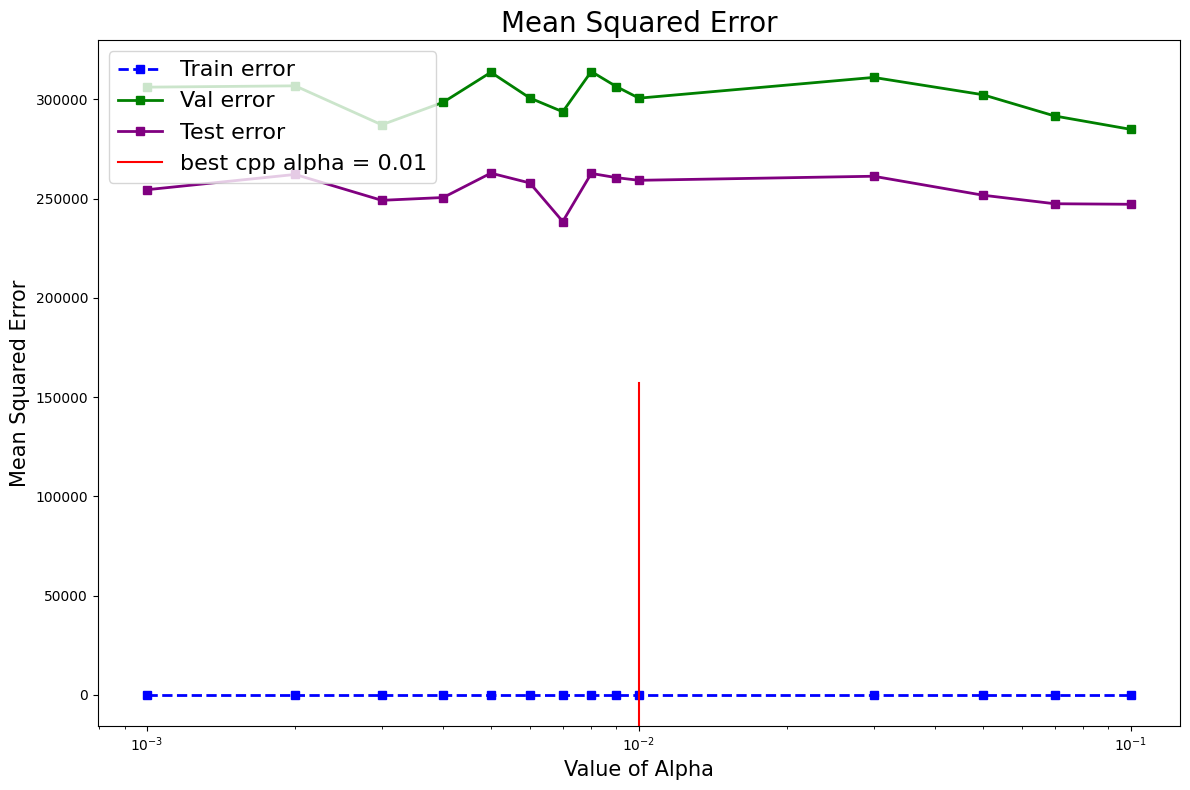

In [19]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(ccp_alphas, train_MSE, 's--', label = 'Train error', color = 'blue', linewidth = 2)

ax.plot(ccp_alphas, val_MSE, 's-', label = 'Val error',color ='green', linewidth = 2)

ax.plot(ccp_alphas, test_MSE, 's-', label = 'Test error',color ='purple', linewidth = 2)

ax.axvline(best_ccp_alpha, 0, 0.5, color = 'r', label = f'best cpp alpha = {best_ccp_alpha}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

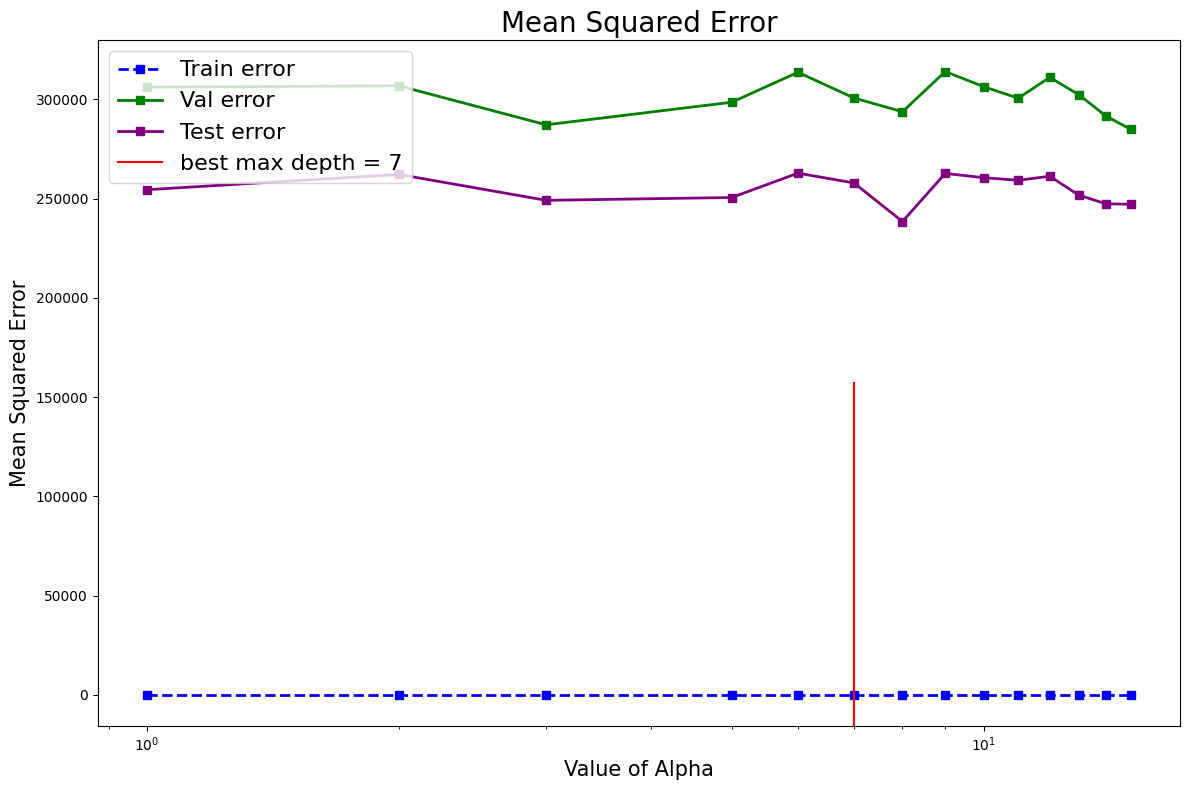

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(depths, train_MSE, 's--', label = 'Train error', color = 'blue', linewidth = 2)

ax.plot(depths, val_MSE, 's-', label = 'Val error',color ='green', linewidth = 2)

ax.plot(depths, test_MSE, 's-', label = 'Test error',color ='purple', linewidth = 2)

ax.axvline(best_max_depth, 0, 0.5, color = 'r', label = f'best max depth = {best_max_depth}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [21]:

best_tree = DecisionTreeRegressor(max_depth = best_max_depth).fit(X_train, y_train)

y_pred_train_val = best_tree.predict(X_train_val)
y_pred_test = best_tree.predict(X_test)

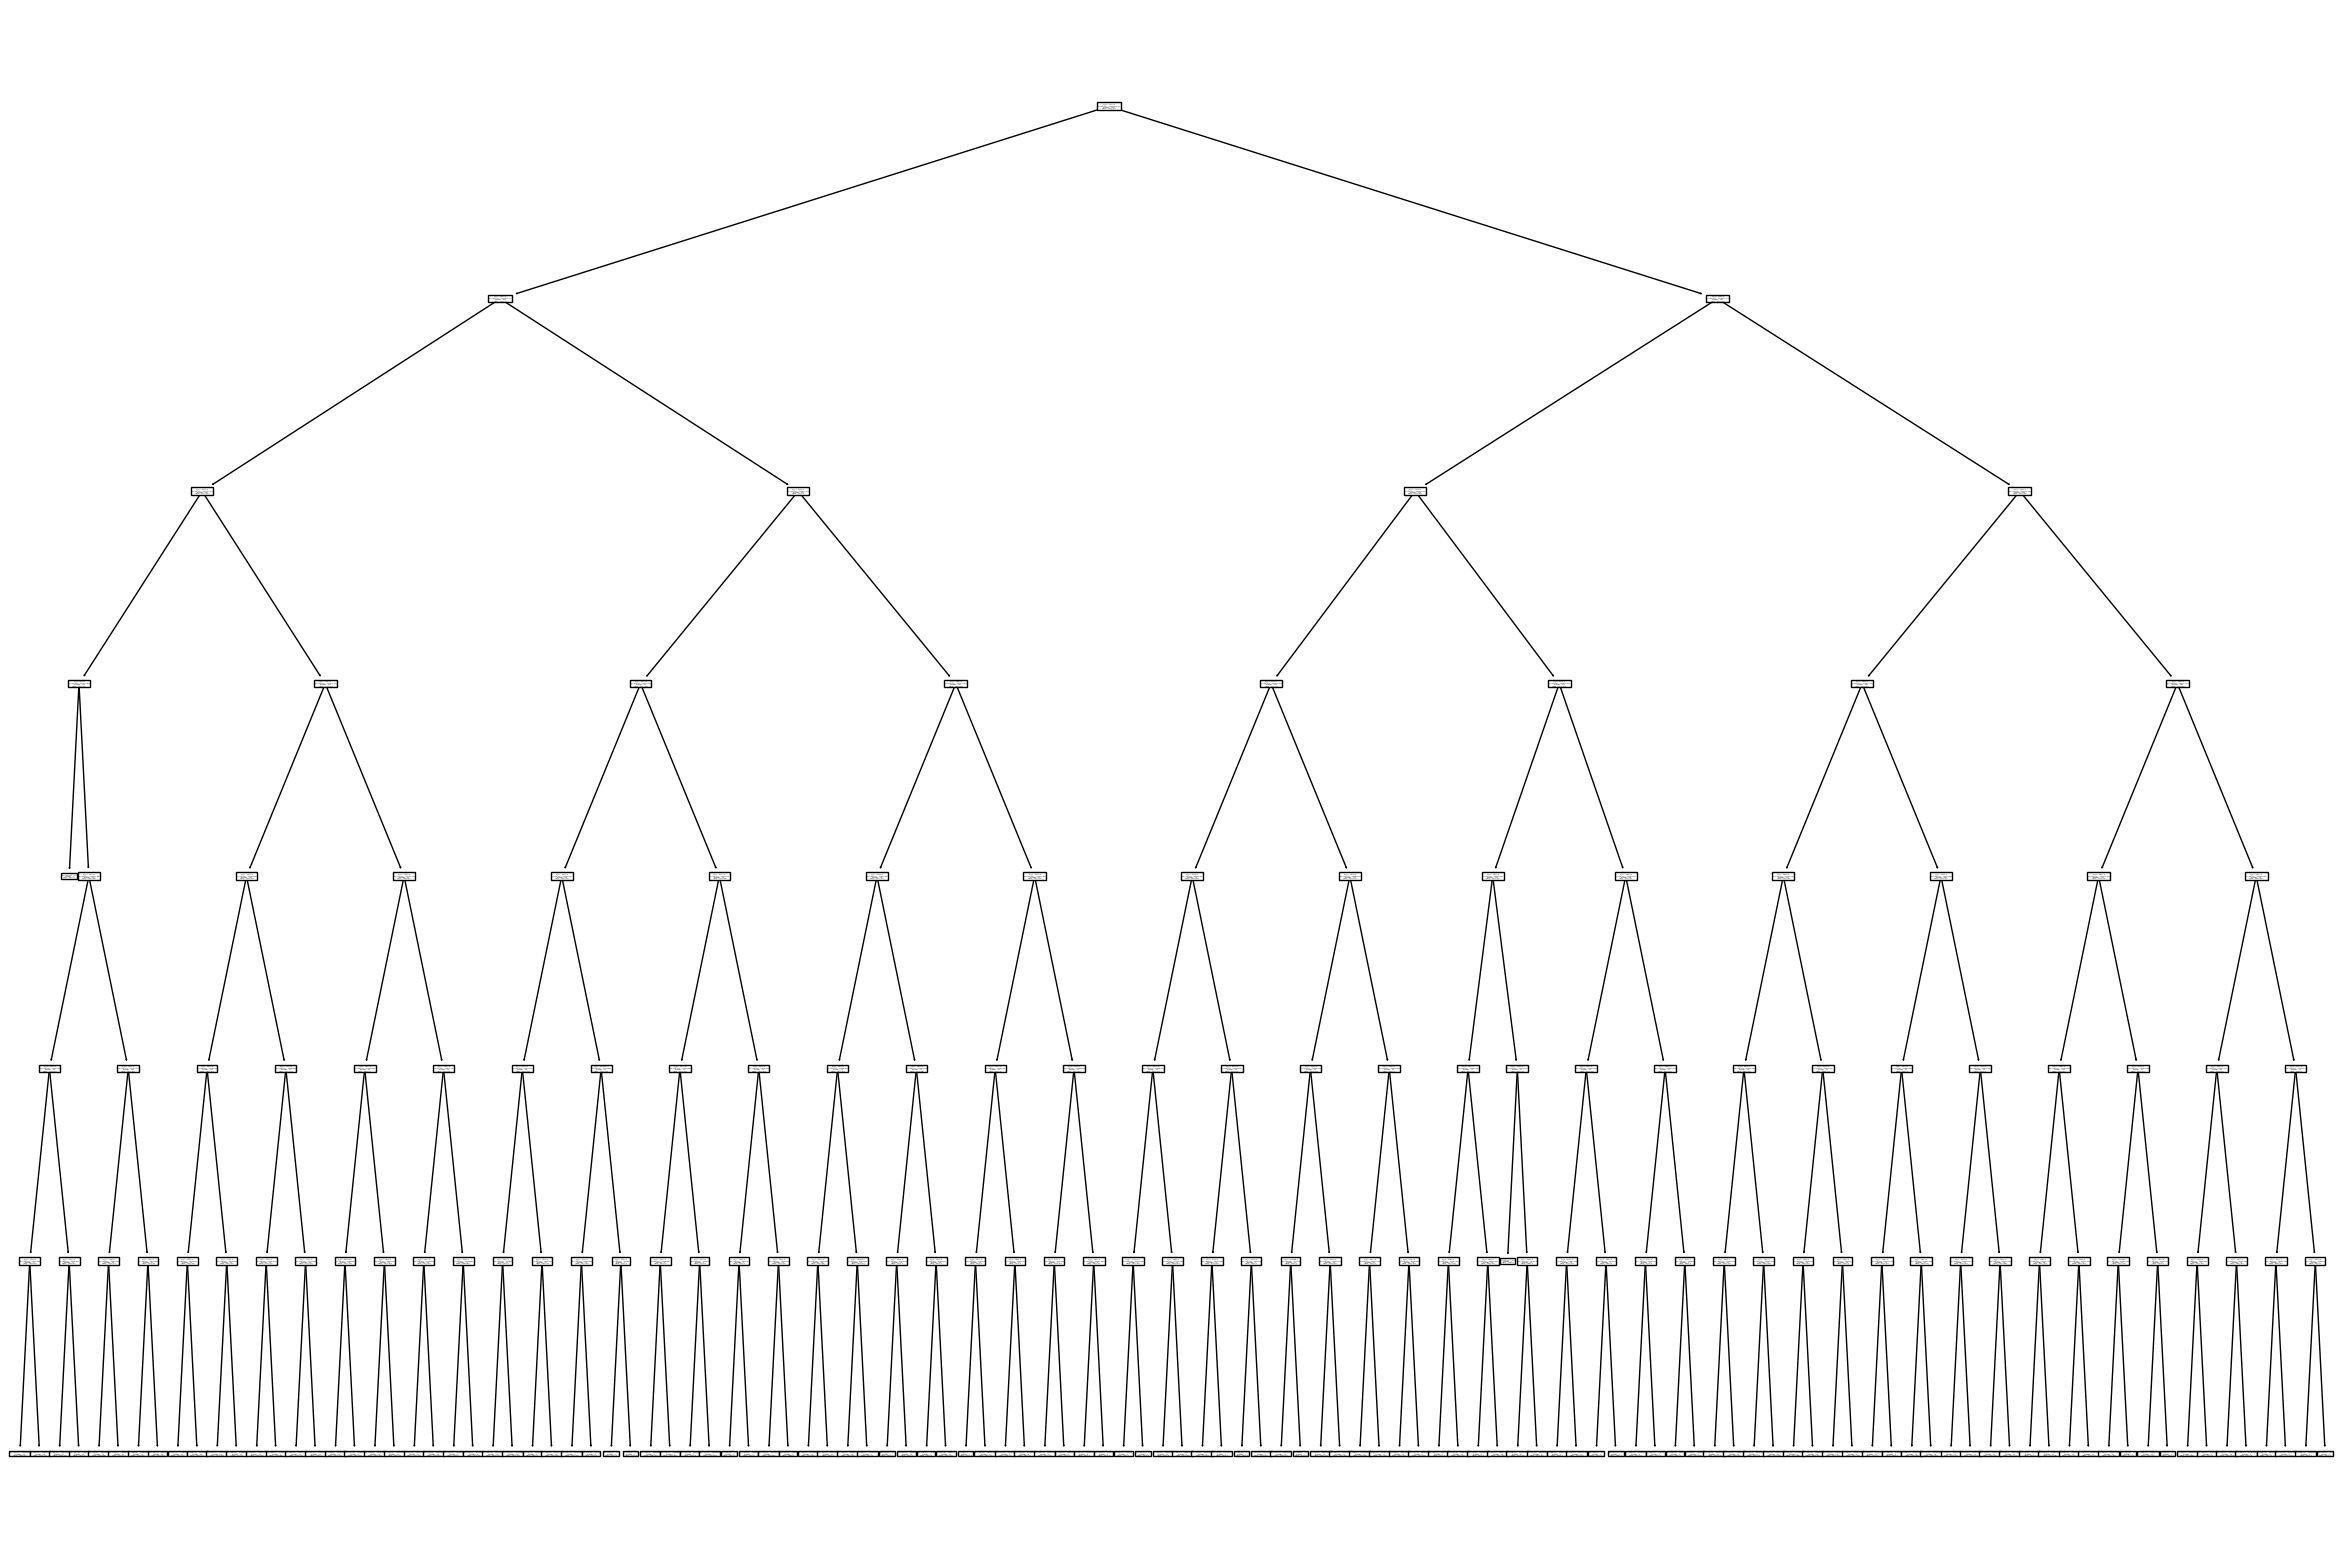

In [22]:
plt.figure(figsize = (30, 20))

plot_tree(best_tree)

plt.show();

In [23]:
MSE_train = mean_squared_error(y_train_val, y_pred_train_val)
r_score_train = r2_score(y_train_val, y_pred_train_val)
MSE_test = mean_squared_error(y_test, y_pred_test)
r_score_test = r2_score(y_test, y_pred_test)
print("MSE train = ", MSE_train)
print("r2 score train = ", r_score_train)
print("MSE test = ", MSE_test)
print("r2 score test = ", r_score_test)

MSE train =  137456.10236086207
r2 score train =  0.998910789739106
MSE test =  216534.272309015
r2 score test =  0.9983493301650749


In [24]:
best_tree = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha).fit(X_train, y_train)

y_pred_train_val = best_tree.predict(X_train_val)
y_pred_test = best_tree.predict(X_test)

In [25]:
MSE_train = mean_squared_error(y_train_val, y_pred_train_val)
r_score_train = r2_score(y_train_val, y_pred_train_val)
MSE_test = mean_squared_error(y_test, y_pred_test)
r_score_test = r2_score(y_test, y_pred_test)
print("MSE train = ", MSE_train)
print("r2 score train = ", r_score_train)
print("MSE test = ", MSE_test)
print("r2 score test = ", r_score_test)

MSE train =  79678.66323907455
r2 score train =  0.9993686215738427
MSE test =  255749.48665297742
r2 score test =  0.9980503873201505


In [26]:
best_tree = DecisionTreeRegressor(max_depth = best_max_depth, ccp_alpha = best_ccp_alpha).fit(X_train, y_train)

y_pred_train_val = best_tree.predict(X_train_val)
y_pred_test = best_tree.predict(X_test)

In [27]:
MSE_train = mean_squared_error(y_train_val, y_pred_train_val)
r_score_train = r2_score(y_train_val, y_pred_train_val)
MSE_test = mean_squared_error(y_test, y_pred_test)
r_score_test = r2_score(y_test, y_pred_test)
print("MSE train = ", MSE_train)
print("r2 score train = ", r_score_train)
print("MSE test = ", MSE_test)
print("r2 score test = ", r_score_test)

MSE train =  137262.72903895404
r2 score train =  0.998912322040712
MSE test =  218982.36722117563
r2 score test =  0.9983306680088193


## Model selection cho decision tree dùng phương pháp cross validation

In [28]:
from sklearn.model_selection import KFold

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

depths = [1, 2, 3, 5,6,7,8,9, 10,11,12,13,14, 15, 16,17, 18, 19, 20]

kf = KFold(n_splits = 10, shuffle=True) 
trainMSE = []
valMSE = []
testMSE = []
for depth in depths:
    train_MSE = []
    val_MSE = []
    test_MSE = []

    for train_index, val_index in kf.split(X_train):

        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index] 
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        dtree = DecisionTreeRegressor(max_depth = depth)

        dtree.fit(X_train_fold, y_train_fold)
        
        y_train_pred = dtree.predict(X_train_fold)
        
        y_val_pred = dtree.predict(X_val_fold)

        y_test_pred = dtree.predict(X_test)

        MSE_train = mean_squared_error(y_train_fold, y_train_pred)
        MSE_val = mean_squared_error(y_val_fold, y_val_pred)
        MSE_test = mean_squared_error(y_test, y_test_pred)

        train_MSE.append(MSE_train)
        val_MSE.append(MSE_val)
        test_MSE.append(MSE_test)

    trainMSE.append(np.mean(MSE_train))
    valMSE.append(np.mean(MSE_val))
    testMSE.append(np.mean(MSE_test))
    print('max_depth: {:3} | train fold MSE: {:5} | val fold MSE: {:5} | test MSE: {:5}'.
          format(depth, round(np.mean(MSE_train), 2), round(np.mean(MSE_val), 2), round(np.mean(MSE_test), 2)))

max_depth:   1 | train fold MSE: 20489028.35 | val fold MSE: 18874160.73 | test MSE: 22954563.95
max_depth:   2 | train fold MSE: 6027888.46 | val fold MSE: 5729530.74 | test MSE: 6770165.72
max_depth:   3 | train fold MSE: 2057194.03 | val fold MSE: 2123251.28 | test MSE: 2378805.14


max_depth:   5 | train fold MSE: 296444.41 | val fold MSE: 1563839.21 | test MSE: 392277.46
max_depth:   6 | train fold MSE: 167851.38 | val fold MSE: 1522494.66 | test MSE: 256978.16
max_depth:   7 | train fold MSE: 115295.79 | val fold MSE: 244873.7 | test MSE: 231889.75
max_depth:   8 | train fold MSE: 75309.95 | val fold MSE: 205205.4 | test MSE: 240564.31
max_depth:   9 | train fold MSE: 38606.24 | val fold MSE: 222567.32 | test MSE: 190743.91
max_depth:  10 | train fold MSE: 29123.26 | val fold MSE: 203676.84 | test MSE: 258725.77
max_depth:  11 | train fold MSE: 12068.05 | val fold MSE: 297660.9 | test MSE: 278574.94
max_depth:  12 | train fold MSE: 6443.77 | val fold MSE: 289128.12 | test MSE: 237440.8
max_depth:  13 | train fold MSE: 3357.57 | val fold MSE: 1576130.7 | test MSE: 212288.13
max_depth:  14 | train fold MSE: 1060.13 | val fold MSE: 322073.11 | test MSE: 218002.06
max_depth:  15 | train fold MSE: 299.53 | val fold MSE: 202825.56 | test MSE: 246591.93
max_depth:  16

In [30]:
best_max_depth = 10


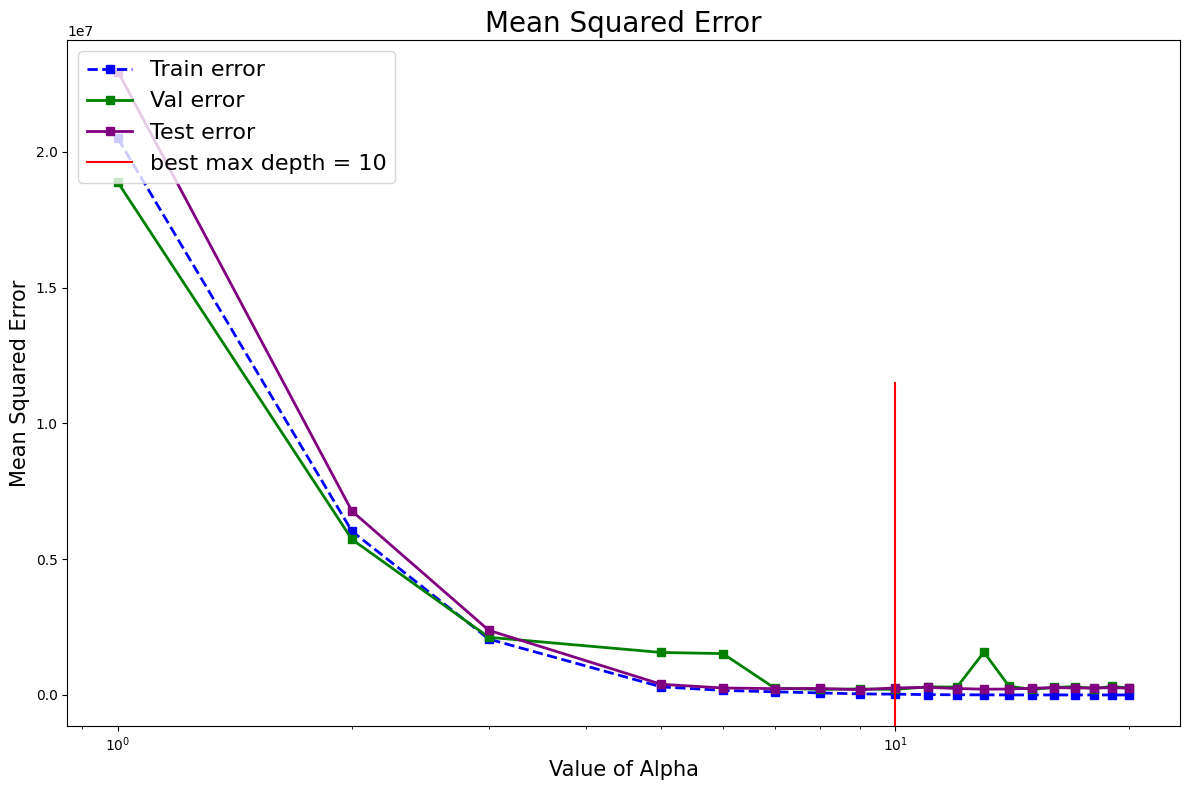

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(depths, trainMSE, 's--', label = 'Train error', color = 'blue', linewidth = 2)

ax.plot(depths, valMSE, 's-', label = 'Val error',color ='green', linewidth = 2)

ax.plot(depths, testMSE, 's-', label = 'Test error',color ='purple', linewidth = 2)

ax.axvline(best_max_depth, 0, 0.5, color = 'r', label = f'best max depth = {best_max_depth}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

In [32]:
dtree = DecisionTreeRegressor(max_depth = best_max_depth)

dtree.fit(X_train, y_train)

y_train_pred = dtree.predict(X_train)

y_test_pred = dtree.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
r_score_train = r2_score(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
r_score_test = r2_score(y_test, y_test_pred)

print('train MSE: {:5} | test MSE: {:5}'.
    format(round(MSE_train, 2), round(MSE_test, 2)))

print("r2 score train = ", r_score_train)
print("r2 score test = ", r_score_test)

train MSE: 24387.31 | test MSE: 222851.61
r2 score train =  0.9998067535246097
r2 score test =  0.9983011722196778
